<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.151349,83.951489,70.425828,2.751360e-06,219.528668,219.528662,0.000006
1,0.0,1.0,65.183148,39.093168,60.471416,2.843950e-05,174.747761,174.747735,0.000026
2,0.0,2.0,47.817212,95.119966,74.166594,2.572390e-06,227.103774,227.103767,0.000007
3,0.0,3.0,20.491839,92.275081,76.011324,-1.565066e-06,198.778243,198.778239,0.000004
4,0.0,4.0,42.762733,72.544032,90.596557,-4.748171e-07,215.903322,215.903315,0.000007
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,69.573709,31.861763,66.102488,3.767023e-05,177.537997,177.537956,0.000042
119996,999.0,116.0,64.652719,52.176996,50.484149,2.447555e-05,177.313888,177.313863,0.000025
119997,999.0,117.0,45.577765,22.409223,51.533693,-5.932600e-05,129.520622,129.520675,-0.000054
119998,999.0,118.0,54.912812,37.743317,83.738738,-2.823499e-05,186.394840,186.394863,-0.000024


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.151349,83.951489,70.425828,2.751360e-06,219.528668,219.528662,0.000006
1,0.0,1.0,65.183148,39.093168,60.471416,2.843950e-05,174.747761,174.747735,0.000026
2,0.0,2.0,47.817212,95.119966,74.166594,2.572390e-06,227.103774,227.103767,0.000007
3,0.0,3.0,20.491839,92.275081,76.011324,-1.565066e-06,198.778243,198.778239,0.000004
4,0.0,4.0,42.762733,72.544032,90.596557,-4.748171e-07,215.903322,215.903315,0.000007
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,69.573709,31.861763,66.102488,3.767023e-05,177.537997,177.537956,0.000042
119996,999.0,116.0,64.652719,52.176996,50.484149,2.447555e-05,177.313888,177.313863,0.000025
119997,999.0,117.0,45.577765,22.409223,51.533693,-5.932600e-05,129.520622,129.520675,-0.000054
119998,999.0,118.0,54.912812,37.743317,83.738738,-2.823499e-05,186.394840,186.394863,-0.000024


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    55.151349  83.951489  70.425828  ...  219.528668  219.528662  0.000006
      1.0    65.183148  39.093168  60.471416  ...  174.747761  174.747735  0.000026
      2.0    47.817212  95.119966  74.166594  ...  227.103774  227.103767  0.000007
      3.0    20.491839  92.275081  76.011324  ...  198.778243  198.778239  0.000004
      4.0    42.762733  72.544032  90.596557  ...  215.903322  215.903315  0.000007
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  69.573709  31.861763  66.102488  ...  177.537997  177.537956  0.000042
      116.0  64.652719  52.176996  50.484149  ...  177.313888  177.313863  0.000025
      117.0  45.577765  22.409223  51.533693  ...  129.520622  129.520675 -0.000054
      118.0  54.912812  37.743317  83.738738  ...  186.394840  186.394863 -0.000024
      119.0  26.933559  57.082833  69.550539  ...  163.566930  163.566929  0.000002

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    55.151349  83.951489  70.425828  ...  219.528668  219.528662  0.000006
      1.0    65.183148  39.093168  60.471416  ...  174.747761  174.747735  0.000026
      2.0    47.817212  95.119966  74.166594  ...  227.103774  227.103767  0.000007
      3.0    20.491839  92.275081  76.011324  ...  198.778243  198.778239  0.000004
      4.0    42.762733  72.544032  90.596557  ...  215.903322  215.903315  0.000007
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  69.573709  31.861763  66.102488  ...  177.537997  177.537956  0.000042
      116.0  64.652719  52.176996  50.484149  ...  177.313888  177.313863  0.000025
      117.0  45.577765  22.409223  51.533693  ...  129.520622  129.520675 -0.000054
      118.0  54.912812  37.743317  83.738738  ...  186.394840  186.394863 -0.000024
      119.0  26.933559  57.082833  69.550539  ...  163.566930  163.566929  0.000002

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.151349,83.951489,70.425828,2.751360e-06,219.528668,219.528662,0.000006
1,0.0,1.0,65.183148,39.093168,60.471416,2.843950e-05,174.747761,174.747735,0.000026
2,0.0,2.0,47.817212,95.119966,74.166594,2.572390e-06,227.103774,227.103767,0.000007
3,0.0,3.0,20.491839,92.275081,76.011324,-1.565066e-06,198.778243,198.778239,0.000004
4,0.0,4.0,42.762733,72.544032,90.596557,-4.748171e-07,215.903322,215.903315,0.000007
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,69.573709,31.861763,66.102488,3.767023e-05,177.537997,177.537956,0.000042
119996,999.0,116.0,64.652719,52.176996,50.484149,2.447555e-05,177.313888,177.313863,0.000025
119997,999.0,117.0,45.577765,22.409223,51.533693,-5.932600e-05,129.520622,129.520675,-0.000054
119998,999.0,118.0,54.912812,37.743317,83.738738,-2.823499e-05,186.394840,186.394863,-0.000024


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    55.151349  83.951489  70.425828  ...  219.528668  219.528662  0.000006
      1.0    65.183148  39.093168  60.471416  ...  174.747761  174.747735  0.000026
      2.0    47.817212  95.119966  74.166594  ...  227.103774  227.103767  0.000007
      3.0    20.491839  92.275081  76.011324  ...  198.778243  198.778239  0.000004
      4.0    42.762733  72.544032  90.596557  ...  215.903322  215.903315  0.000007
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  69.573709  31.861763  66.102488  ...  177.537997  177.537956  0.000042
      116.0  64.652719  52.176996  50.484149  ...  177.313888  177.313863  0.000025
      117.0  45.577765  22.409223  51.533693  ...  129.520622  129.520675 -0.000054
      118.0  54.912812  37.743317  83.738738  ...  186.394840  186.394863 -0.000024
      119.0  26.933559  57.082833  69.550539  ...  163.566930  163.566929  0.000002

[120000 rows x 7 columns]

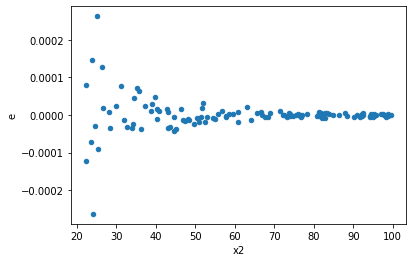

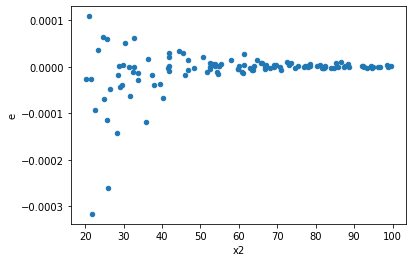

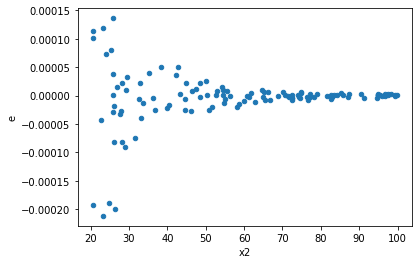

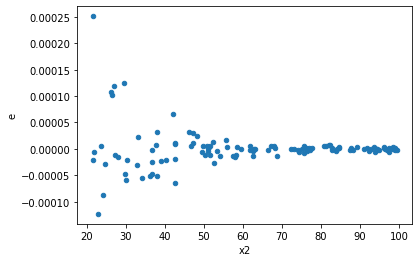

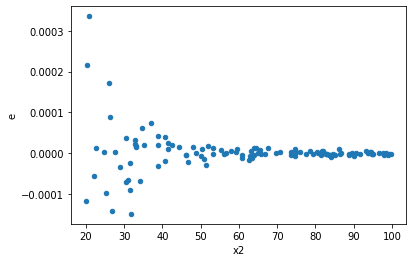

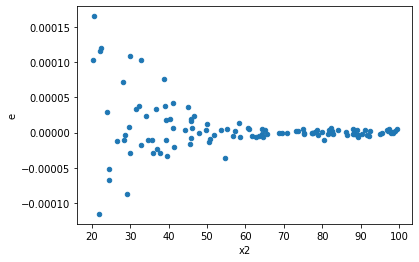

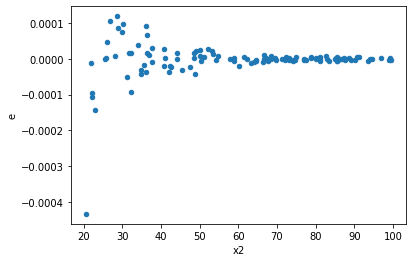

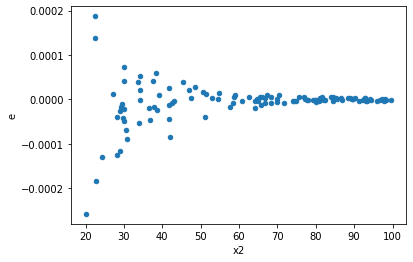

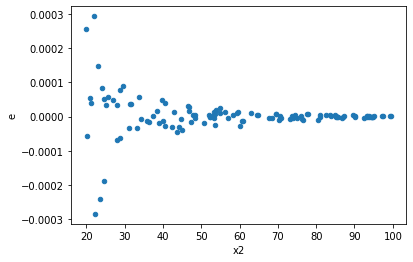

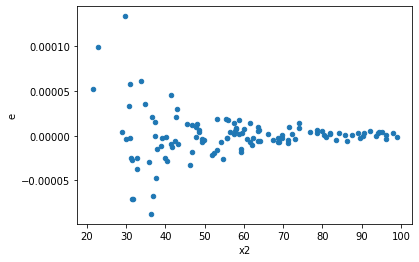

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,6.375181795609931e-10,2.398059664720963e-07,1.4489049535477115e-11,5.450135601638552e-09,0.0026584750535603306,4.205604308821887e-46,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,6.114256247968214e-10,2.3612000469734315e-07,1.3896036927200485e-11,5.366363743121436e-09,0.0025894698146416784,2.3341406999635254e-46,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,4.974688657163732e-10,2.6386048227517484e-07,1.1306110584463027e-11,5.99682914261761e-09,0.001885348125747655,1.9069422708192175e-49,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,4.794551452658796e-10,1.4821792234930505e-07,1.0896707846951809e-11,3.3685891443023874e-09,0.003234798718443429,3.3916221934346644e-44,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,7.211203326468585e-10,3.041590604741137e-07,1.6389098469246786e-11,6.91270591986622e-09,0.0023708658605231044,3.238693859416757e-47,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,5.17714747862283e-10,1.2134513747276233e-07,1.1766244269597342e-11,2.757844033471871e-09,0.004266464719103323,1.644933401600793e-41,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,6.365619398134092e-10,3.0059027378567923e-07,1.446731681394112e-11,6.83159713149271e-09,0.0021177063775099977,2.580287221253585e-48,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,3.803700621481296e-10,2.3418398920264206e-07,8.644774139730218e-12,5.322363390969138e-09,0.0016242359840364282,6.737672856774032e-51,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,8.317621626733969e-10,3.6019916391168707e-07,1.8903685515304475e-11,8.186344634356524e-09,0.0023091729409936298,1.794257222784478e-47,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64